# This Notebook Explores the Gradient Descent Process Which Underlies Linear Regression

Example Data Pulled from this [Article](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)

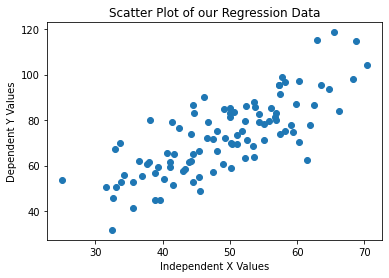

In [1]:
#Making our necessary imports to read/process the data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading the input data using into a pandas dataframe
data = pd.read_csv('Linear_Regression_Data.csv')

#pulling our x and y values from the data frame
x_vals = data['X Data']
y_vals = data['Y Data']

#plotting our x/y data
plt.xlabel('Independent X Values')
plt.ylabel('Dependent Y Values')
plt.title('Scatter Plot of our Regression Data')
plt.scatter(x_vals,y_vals)
plt.show()

# Note:
* Our Linear Regression Model is of the form: $\hat{y} = mx + c$

* $\hat{y}$ = our prediction given the independent variable x and parameters m & c

* The parameters m & c will be fitted using Gradient Descent

* We will fit our model for 1000 epochs

# Laying Linear Regression Model Groundwork

In [2]:
#hard coding a learning rate for our model
learn_rate = 0.0001

#hard coding the number of epochs we will train our model
epochs = 1000

"""
Initializing logs of:
1) m & c parameter values --> Will converge to optimized values
2) Overall Error --> Will minimize
3) Partial m & c Derivative Values --> Will converge to 0
"""

m_log = [0]*epochs
c_log = [0]*epochs
partial_m_log = [0]*epochs
partial_c_log = [0]*epochs
error_log = [0]*epochs

#initilizing m & c parameters to 0
m = 0
c = 0

# Steps of the Iterative Gradient Descent Process:
1. Compute our current predictor function given m & c parameters. Recall: $\hat{y} = mx + c$
2. Calculate the partial derivatives of our error function using our predictor function + the current m & c parameter values
3. Update our m & c parameters via: $parameter_{next} = parameter_{current} - (LearningRate)(\frac{\partial Error}{\partial parameter_{current}})$
4. Repeat Steps 1-3 for our number of training epochs

# Creating our Necessary Helper Methods:

#### This function calculates the output value of our predictor function given values for parameters m/c & an x input datapoint

Recall, our predictor function is of the form: $\hat{y} = mx + c$

In [3]:
def predictor_function(m,c,x):
    """
    :param m --> The current Value of our m parameter
    :param c --> The current Value of our c parameter
    :param x --> The independent X value
    :return --> Our current Y prediction for the provided x value
    """
    return m*x + c

#### This function calculates the partial m derivative of our Error function given the current m & c parameter values.

$\frac{\partial Error}{\partial m}=\frac{-2}{n}\sum\limits_{i=0}^{n}(x_i)(y_i-\hat{y}_i)$

In [4]:
def calc_partial_m(x_data,y_data,m_current,c_current):
    """
    :param m_current --> the current Value of our m parameter
    :param c_current --> the current Value of our c parameter
    :param x_data --> The x training data we our fitting our model to the
    :param y_data --> The y training data we our fitting our model to the
    return --> The Partial m Derivative of our Error function given our current m & c parameter values
    """
    return -2/len(x_data) * sum([x_data*(y_data - predictor_function(m_current,c_current,x_data))
                       for x_data,y_data in zip(x_data,y_data)])

#### This function calculates the partial c derivative of our Error function given the current m & c parameter values.

$\frac{\partial Error}{\partial c}=\frac{-2}{n}\sum\limits_{i=0}^{n}(y_i-\hat{y}_i)$

In [5]:
def calc_partial_c(x_data,y_data,m_current,c_current):
    """
    :param x_data --> The x training data we our fitting our model to the
    :param y_data --> The y training data we our fitting our model to the
    :param m_current --> the current Value of our m parameter
    :param c_current --> the current Value of our c parameter
    return --> The Partial c Derivative of our Error function given our current m & c parameter values
    """
    return -2/len(x_data) * sum([y_data - predictor_function(m_current,c_current,x_data)
                                 for x_data,y_data in zip(x_data,y_data)])

#### This function is used to iteratively update our m parameter until it is optimized.

$m_{next} = m_{current} - (LearningRate)(\frac{\partial Error}{\partial m_{current}})$


In [6]:
def update_m(m_current,learning_rate,partial_m):
    """
    :param m_current --> the current Value of our m parameter
    :param learning_rate --> the step size adjustor for our gradient descent optimization
    :param partial_m --> the current partial derivative of our cost function with respect to m
    return --> Our updated m parameter value
    """
    return m_current - learning_rate*partial_m

#### This function is used to iteratively update our c parameter until it is optimized.

$c_{next} = c_{current} - (LearningRate)(\frac{\partial Error}{\partial c_{current}})$

In [7]:
def update_c(c_current,learning_rate,partial_c):
    """
    :param c_current --> the current Value of our c parameter
    :param learning_rate --> the step size adjustor for our gradient descent optimization
    :param partial_c --> the current partial derivative of our cost function with respect to c
    return --> Our updated c parameter value
    """
    return c_current - learning_rate*partial_c

#### This function is used to compute the value of our error function given the current values of the m & c parameters

$Error(m,c)=\frac{1}{n}\sum\limits_{i=0}^{n}(y_i-\hat{y_i})^2$

In [8]:
def error_function(x_data,y_data,m_current,c_current):
    """
    :param x_data --> The x training data we our fitting our model to
    :param y_data --> The y training data we our fitting our model to
    :param m_current --> the current Value of our m parameter
    :param c_current --> the current Value of our c parameter
    return --> The Mean Squared Error at our current m & c parameter values
    """

    return 1/len(x_data) * sum([(y_data - predictor_function(m_current,c_current,x_data))**2
                                for x_data,y_data in zip(x_data,y_data)])



# Performing Iterative Gradient Descent to Optimize Our Linear Regression Model

In [9]:
for epoch in range(epochs):

    #calculating and logging our current partial m value
    partial_m = calc_partial_m(x_vals,y_vals,m,c)
    partial_m_log[epoch] = partial_m

    #calculating and logging our current partial c value
    partial_c = calc_partial_c(x_vals,y_vals,m,c)
    partial_c_log[epoch] = partial_c

    #calculating and logging our current m parameter value
    m = update_m(m,learn_rate,partial_m)
    m_log[epoch] = m

    #calculating and logging our current c parameter value
    c = update_c(c,learn_rate,partial_c)
    c_log[epoch] = c

    #calculating and logging our current error value
    error = error_function(x_vals,y_vals,m,c)
    error_log[epoch] = error

## Plotting our m parameter value over the number epochs

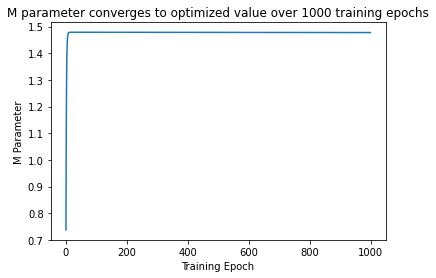

In [10]:
plt.plot(np.arange(epochs),m_log)
plt.xlabel("Training Epoch")
plt.ylabel('M Parameter')
plt.title(f'M parameter converges to optimized value over {epochs} training epochs')
plt.show()

## Plotting our c parameter value over the number epochs

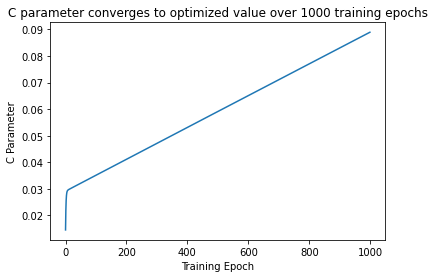

In [11]:
plt.plot(np.arange(epochs),c_log)
plt.xlabel("Training Epoch")
plt.ylabel('C Parameter')
plt.title(f'C parameter converges to optimized value over {epochs} training epochs')
plt.show()

## Plotting our partial m value over the number epochs

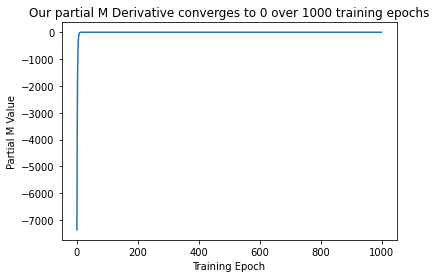

In [12]:
plt.plot(np.arange(epochs),partial_m_log)
plt.xlabel('Training Epoch')
plt.ylabel('Partial M Value')
plt.title(f'Our partial M Derivative converges to 0 over {epochs} training epochs')
plt.show()

## Plotting our partial c value over the number epochs

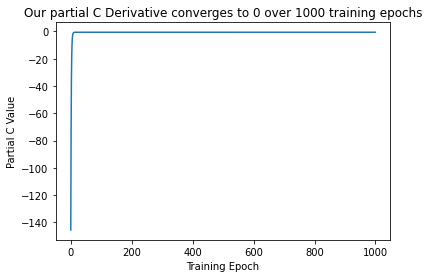

In [13]:
plt.plot(np.arange(epochs),partial_c_log)
plt.xlabel("Training Epoch")
plt.ylabel('Partial C Value')
plt.title(f'Our partial C Derivative converges to 0 over {epochs} training epochs')
plt.show()

## Plotting our overall Mean Squared Error value over the number epochs

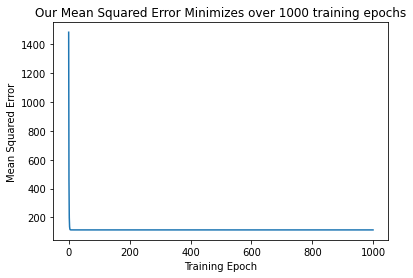

In [14]:
#plotting our overall error value over our number epochs
plt.plot(np.arange(epochs),error_log)
plt.xlabel("Training Epoch")
plt.ylabel('Mean Squared Error')
plt.title(f'Our Mean Squared Error Minimizes over {epochs} training epochs')
plt.show()

## Plotting our optimized linear regression model

Optimized M Parameter Value: 1.4777440851889796
Optimized C Parameter Value: 0.08893651996682017
Overall Final Predictor Function: Y = 1.4777x + 0.0889


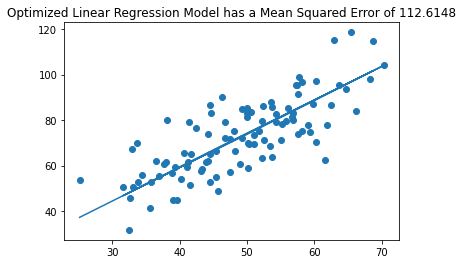

In [15]:
#pulling the optimized m/c parameter values from our very last epochs
m_optimized = m_log[-1]
c_optimized = c_log[-1]

y_predicts = [predictor_function(m_optimized,c_optimized,x_val) for x_val in x_vals]

#plotting our raw data
plt.scatter(x_vals,y_vals)

#plotting our prediction line
plt.plot(x_vals,y_predicts)

#Labeling Plot
plt.title(f'Optimized Linear Regression Model has a Mean Squared Error of '
          f'{round(error_function(x_vals,y_vals,m_optimized,c_optimized),4)}')
#printing our optimized parameter
print(f'Optimized M Parameter Value: {m_optimized}')
print(f'Optimized C Parameter Value: {c_optimized}')
print(f'Overall Final Predictor Function: Y = {round(m_optimized,4)}x + {round(c_optimized,4)}')